In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time


In [2]:
# Retrieve data from csv
time_data = pd.read_csv("clean_data.csv")
time_data.head()

,Unnamed: 0,city,state,date_time,shape,duration,text
0,0,Chester,VA,2019-12-12T18:43:00,light,5 seconds,My wife was driving southeast on a fairly popu...
1,1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,I think that I may caught a UFO on the NBC Nig...
2,5,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes,"The object has flashing lights that are green,..."
3,7,Gold Canyon,AZ,2019-04-10T17:00:00,circle,10 minutes,Apr. 10th we witnessed a very bright silvery r...
4,8,Dallas,TX,1973-07-14T22:00:00,oval,6 minutes,Ufos report in Irving Texas at 2200 hrs. On o...


In [3]:
# Drop unnecessary unnamed column
time_data = time_data.drop("Unnamed: 0", axis=1)
time_data.head()

,city,state,date_time,shape,duration,text
0,Chester,VA,2019-12-12T18:43:00,light,5 seconds,My wife was driving southeast on a fairly popu...
1,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,I think that I may caught a UFO on the NBC Nig...
2,Kirbyville,TX,2019-04-02T20:25:00,disk,15 minutes,"The object has flashing lights that are green,..."
3,Gold Canyon,AZ,2019-04-10T17:00:00,circle,10 minutes,Apr. 10th we witnessed a very bright silvery r...
4,Dallas,TX,1973-07-14T22:00:00,oval,6 minutes,Ufos report in Irving Texas at 2200 hrs. On o...


In [4]:
# Convert original timestamp into usable timestamp
date_format = "%Y-%m-%dT%H:%M:%S"
date_time = []

# Loop conversion through each row
for x in range(len(time_data['date_time'])):
    ts = time.strptime(time_data.iloc[x,2], date_format)
    dt = time.strftime('%Y-%m-%d %H:%M:%S', ts)
    date_time.append(dt)

In [5]:
# Change new timestamp to correct datetime object type
time_data["timestamp"] = date_time
time_data = time_data[['city', 'state', 'timestamp']]
time_data['converted_timestamp'] = pd.to_datetime(time_data['timestamp'], format='%Y-%m-%d %H:%M:%S')
time_data.head()

,city,state,timestamp,converted_timestamp
0,Chester,VA,2019-12-12 18:43:00,2019-12-12 18:43:00
1,Rocky Hill,CT,2019-03-22 18:30:00,2019-03-22 18:30:00
2,Kirbyville,TX,2019-04-02 20:25:00,2019-04-02 20:25:00
3,Gold Canyon,AZ,2019-04-10 17:00:00,2019-04-10 17:00:00
4,Dallas,TX,1973-07-14 22:00:00,1973-07-14 22:00:00


In [6]:
# Create columns for each individual piece of the timestamp
time_data['year'] = time_data['converted_timestamp'].dt.year
time_data['month'] = time_data['converted_timestamp'].dt.month
time_data['day'] = time_data['converted_timestamp'].dt.day
time_data['hour'] = time_data['converted_timestamp'].dt.hour
time_data['minute'] = time_data['converted_timestamp'].dt.minute
time_data = time_data[['city', 'state', 'year', 'month', 'day', 'hour', 'minute', 'converted_timestamp']]
time_data.head()

,city,state,year,month,day,hour,minute,converted_timestamp
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00
2,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00
3,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00
4,Dallas,TX,1973,7,14,22,0,1973-07-14 22:00:00


In [7]:
# Export new df to csv for later use
time_data.to_csv('timedata.csv')

In [8]:
# Bin years into decades
bins = [0,1979,1989,1999,2009,2020]
group_names = ['1969-1972','1980-1989','1990-1999','2000-2009','2010-2019']
time_data['decades'] = pd.cut(time_data['year'],
                             bins, labels=group_names,
                             include_lowest = True)
time_data.head()

,city,state,year,month,day,hour,minute,converted_timestamp,decades
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,2010-2019
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,2010-2019
2,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,2010-2019
3,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,2010-2019
4,Dallas,TX,1973,7,14,22,0,1973-07-14 22:00:00,1969-1979


<Axes: title={'center': 'Sightings per Year'}, xlabel='year', ylabel='# Sightings'>

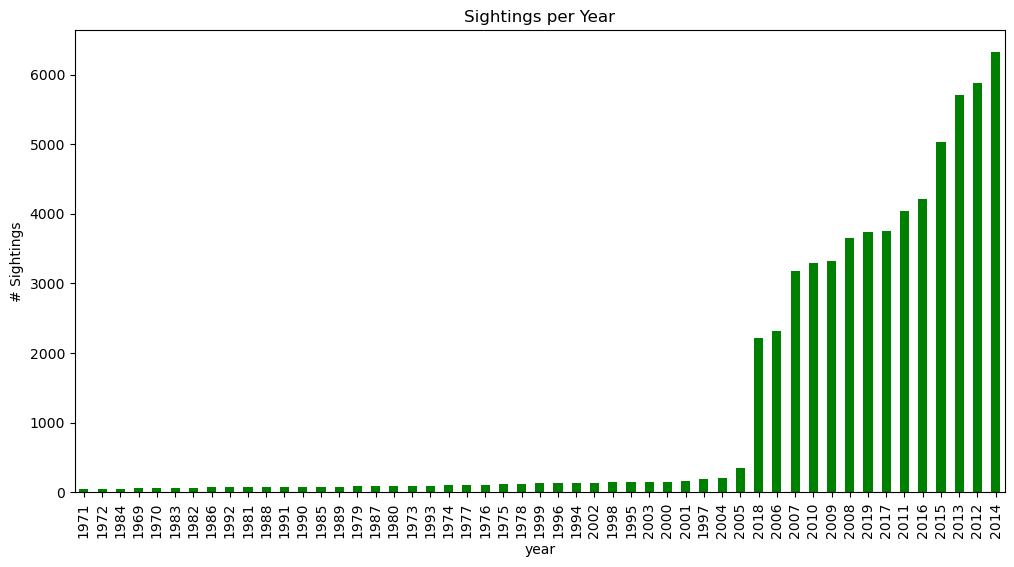

In [85]:
# Count sightings per year and plot
time_data['year'].value_counts().sort_index().plot(kind='bar', color='green',
                                                   ylabel='# Sightings',
                                                   title='Sightings per Year',
                                                   figsize=(12,6))